# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 1384 Степаненко Денис Владиславович и Белокобыльский Илья Вадимович. Вариант №6.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

$S(nT)$ – функция сигнала от дискретного времени $nT$

$S(T)$ – функция дискретного времени, где $n$ – номера временных счетов

$\delta_d(k)=\left\{ \begin{array}{cl}
1, & k = 0 \\
0, & k \neq 0
\end{array} \right., k\in\mathcal{Z}$ - единичный цифровой импульс (дискретный аналог дельта функции)

$\delta_d(t)=\left\{ \begin{array}{cl}
\ ∞, & t=0 \\
0, & t \ne 0
\end{array} \right., t \in \mathbb{R}$ - дельта функция


$\sigma_d(k)=\left\{ \begin{array}{cl}
1, & k \geq 0 \\
0, & k < 0
\end{array} \right., k\in\mathcal{Z}$ - дискретный единичный скачок (дискретный аналог функции Хэвисайда)

$\delta(t)=\left\{ \begin{array}{cl}
\ 1, & t>0 \\
\ 0,5 & t=0 \\
0, & t < 0 \\
\end{array} \right., t \in \mathbb{R}$ - функция Хэвисайда

$s_1(k) =\left\{ \begin{array}{cl}
0, & k < 0 \\
a^k, & k \geq 0
\end{array} \right., k\in\mathcal{Z}$ - дискретная экспоненциальная функция

$s_2(k) = C\exp(j\hat{\omega}_0k)$ - дискретный комплексный гармонический сигнал

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

###Пункт 0.
Рассчитаем константы для варианта.

|    Переменная    |            Назначение            | Значение |
|:----------------:|:--------------------------------:|:--------:|
|   $N_{бр}$     |           Номер бригады           |      6    |
|        $N$     |     Длина последовательности      |   31       |
|        $T$     |       Период дискретизации        |      0.0035    |
|        $a$     |       Основание экспоненты        |    0.83      |
|        $C$     | Амплитуда гармонического сигнала  |     2     |
|$\hat\omega_0$ (рад)| Частота гармонического сигнала|     0.4488    |
|      $m$       |             Задержка              |     6     |


In [6]:
import numpy as np
import matplotlib.pyplot as plt


Nb = 6
N = 30+Nb%5
T = 0.0005*(1+Nb)%3
a = (-1.0)**Nb*(0.8+0.005*(Nb%20))
C = 1+Nb%5
w0 = np.pi/(6+6%5)
m = 5+Nb%5
print("Nb =", Nb, "\nN =", N,"\na =",a, "\nT =", T, "\nC =", C, "\nw0 =",w0, "\nm =", m)

Nb = 6 
N = 31 
a = 0.8300000000000001 
T = 0.0035 
C = 2 
w0 = 0.4487989505128276 
m = 6


###Пункт 1.
Смоделируем единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$.

In [7]:
#Моделирование единичного цифрового импульса в интервале дексретного времени.
interval =  np.arange(0, (N-1)*T,  T)
interval_norm = np.linspace(0, N-1, N)
delta_d_norm = lambda k: np.where(k == 0, 1, 0)
delta_d = lambda k: delta_d_norm(k / T)

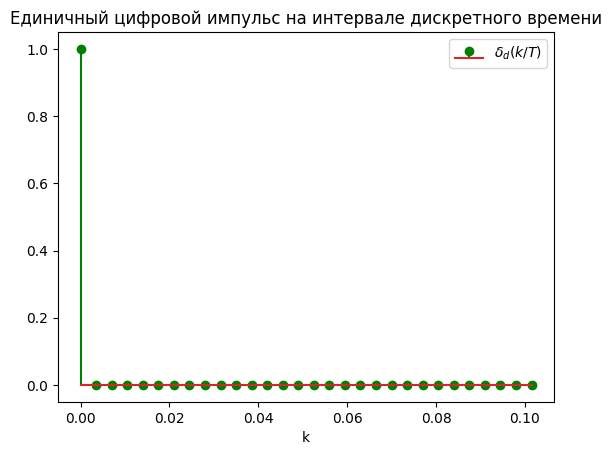

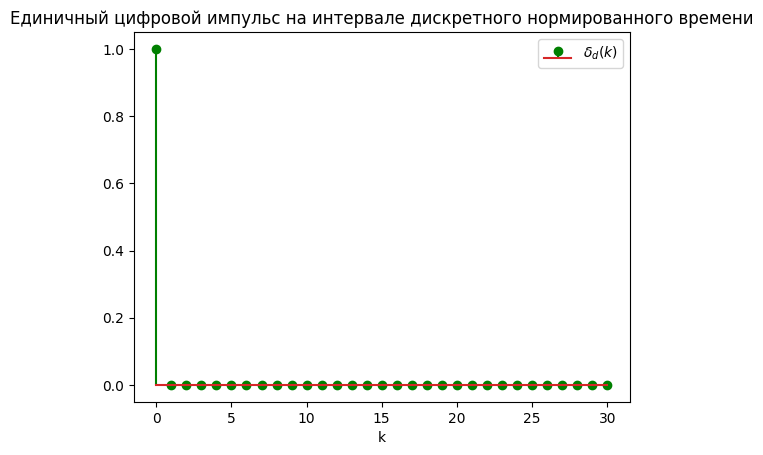

In [8]:
#Графики
fig, ax = plt.subplots()
ax.stem(interval, delta_d(interval), label='$\delta_d(k/T)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Единичный цифровой импульс на интервале дискретного времени")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.stem(interval_norm, delta_d_norm(interval_norm), label='$\delta_d(k)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Единичный цифровой импульс на интервале дискретного нормированного времени")
ax.legend()
plt.show()

а) взаимосвязь между дискретным и дискретным нормированным временем:
k = nT, где k - дискретное временя, n - дискретное нормированное время, Т - шаг дискретизации.

б) различие между единичным цифровым импульсом и дельта-функцией:

$\delta_d(k)=\left\{ \begin{array}{cl}
1, & k = 0 \\
0, & k \neq 0
\end{array} \right., k\in\mathcal{Z}$ - единичный цифровой импульс (дискретный аналог дельта функции)

$\delta_d(t)=\left\{ \begin{array}{cl}
\ ∞, & t=0 \\
0, & t \ne 0
\end{array} \right.$ - дельта функция

Дельта функция в нуле имеет значение бесконечности, область ее определения $\mathbb{R}$ в отличие от дискретного аналога, где значение в нуле равно 1, а область определения - целые числа.

###Пункт2.
Смоделируем дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$.

In [9]:
#Моделирование дискретного единичного скачка в интервале дексретного времени.
interval =  np.arange(0, (N-1)*T,  T)
interval_norm = np.linspace(0, N-1, N)
sigma_d_norm = lambda k: np.where(k >= 0, 1, 0)
sigma_d = lambda k: sigma_d_norm(k / T)

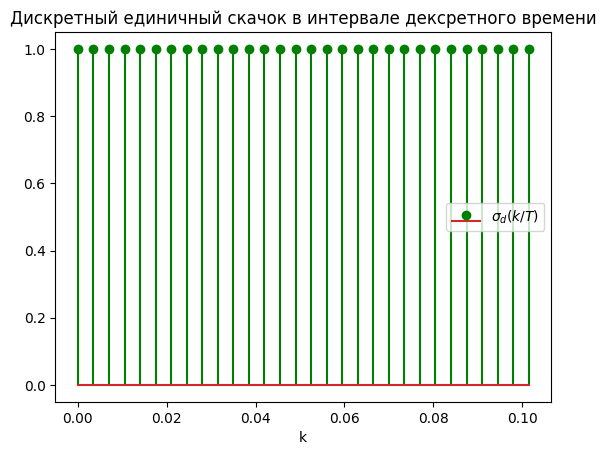

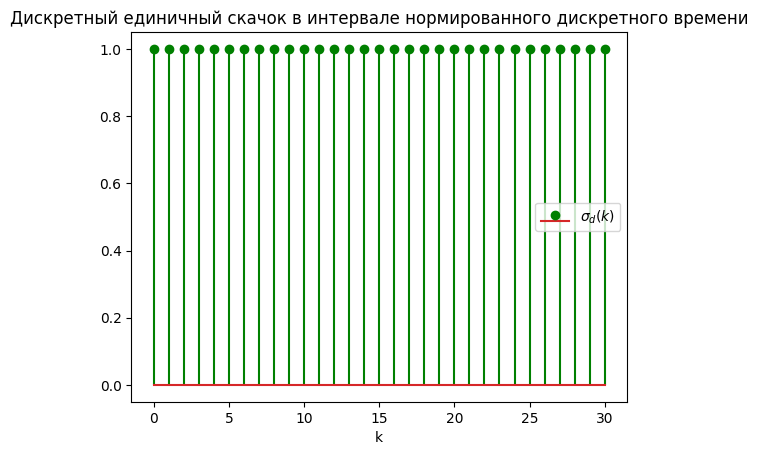

In [10]:
#Графики
fig, ax = plt.subplots()
ax.stem(interval, sigma_d(interval),label='$\sigma_d(k/T)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Дискретный единичный скачок в интервале дексретного времени")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.stem(interval_norm, sigma_d_norm(interval_norm), label='$\sigma_d(k)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Дискретный единичный скачок в интервале нормированного дискретного времени")
ax.legend()
plt.show()

а) соответствие между дискретным и аналоговым единичными скачками:

$\delta(t)=\left\{ \begin{array}{cl}
\ 1, & t>0 \\
\ 0,5 & t=0 \\
0, & t < 0 \\
\end{array} \right., t \in \mathbb{R}$ - функция Хэвисайда

Функция Хэвисайда в нуле равна 0.5 либо не определена, в то время  как дискретный аналог равен 1.

б) частота дискретизации дискретного единичного скачка:

  $f = \frac{1}{T} = \frac{1}{0.0035} \approx 285,7 $

###Пункт 3.
Смоделируем дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$.

In [11]:
#Моделирование дискретной экспоненциальной функции.
interval =  np.arange(0, (N-1)*T,  T)
interval_norm = np.linspace(0, N-1, N)
s_1_norm = lambda k: np.where(k >= 0, a**k, 0)
s_1 = lambda k: s_1_norm(k / T)

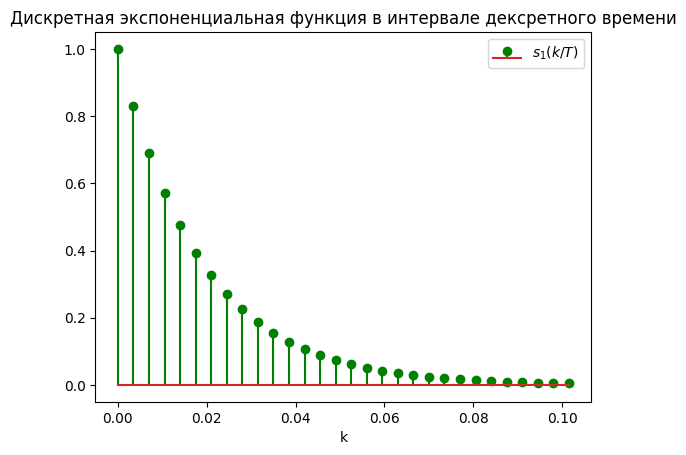

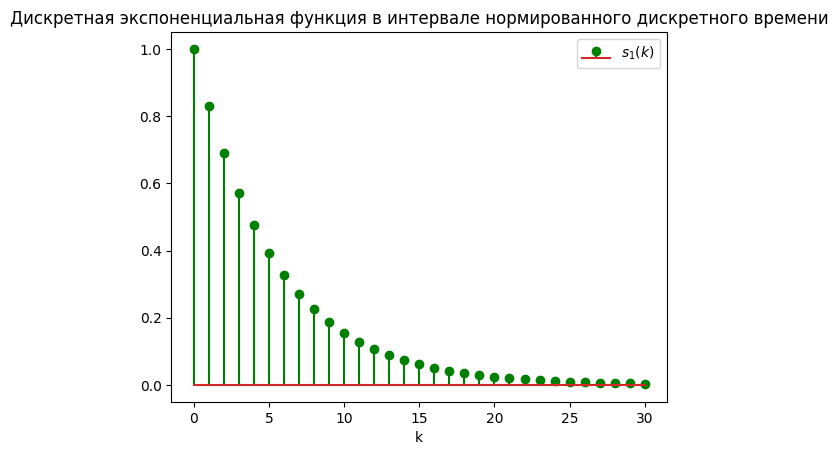

In [12]:
#Графики
fig, ax = plt.subplots()
ax.stem(interval, s_1(interval),label='$s_1(k/T)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Дискретная экспоненциальная функция в интервале дексретного времени")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.stem(interval_norm, s_1_norm(interval_norm), label='$s_1(k)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Дискретная экспоненциальная функция в интервале нормированного дискретного времени")
ax.legend()
plt.show()

Соответствие между дискретной и аналоговой экспонентами:

$s_1(k) =\left\{ \begin{array}{cl}
0, & k < 0 \\
a^k, & k \geq 0
\end{array} \right., k\in\mathcal{Z}$

Разница между функциями в значении на интервале $(-\infty; 0)$ - аналоговая функция имеет значение $a^x$, а дискретный аналог - 0.

###Пункт 4.
Смоделируем дискретный комплексный гармонический сигнал $s_2(k) = C\exp(j\hat{\omega}_0k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N - 1]$.

In [13]:
#Моделирование дискретного комплексного гармонического сигнала.
interval_norm = np.linspace(0, N-1, N*10)
s_2_norm = lambda k: C * np.exp(1j * w0 * k)
s_2_real = lambda k: s_2_norm(k).real
s_2_imag = lambda k: s_2_norm(k).imag

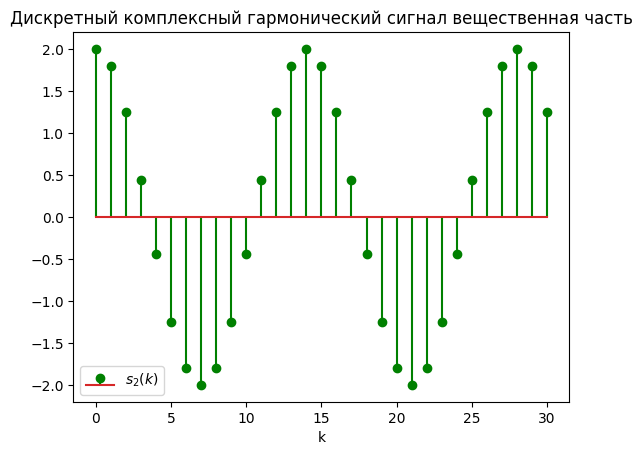

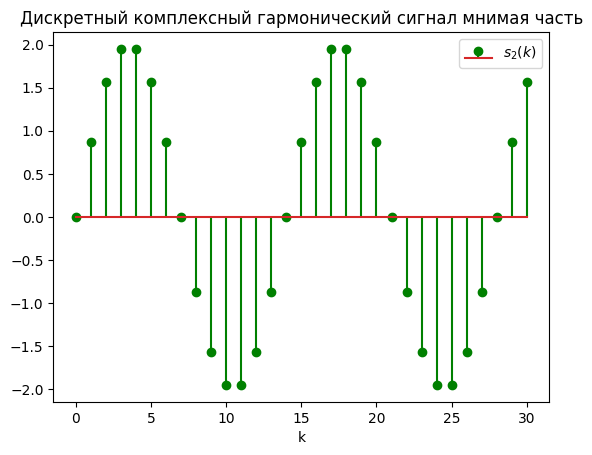

In [21]:
#Графики
fig, ax = plt.subplots()
ax.stem(interval_norm, s_2_real(interval_norm),label='$s_2(k)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Дискретный комплексный гармонический сигнал вещественная часть")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.stem(interval_norm, s_2_imag(interval_norm), label='$s_2(k)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Дискретный комплексный гармонический сигнал мнимая часть")
ax.legend()
plt.show()

Запишем данный сигнал в виде комбинации двух вещественных последовательностей:

$s_2(k) = C\cos(\hat{\omega}_0Tk) + jC\sin(\hat{\omega}_0Tk)$


###Пукнт 5.

Выведем графики последовательностей $\delta_d(k), \sigma_d(k), s_1(k)$ , задержанных на $m$ отсчетов, на интервале времени $n \in [0, N - 1]$.

In [15]:
interval =  np.arange(0, (N-1)*T,  T)
interval_norm = np.linspace(0, N-1, N)

shifted_delta_norm = lambda k: delta_d_norm(k - m)
shifted_sigma_norm = lambda k: sigma_d_norm(k - m)
shifted_s_1_norm = lambda k: s_1_norm(k - m)

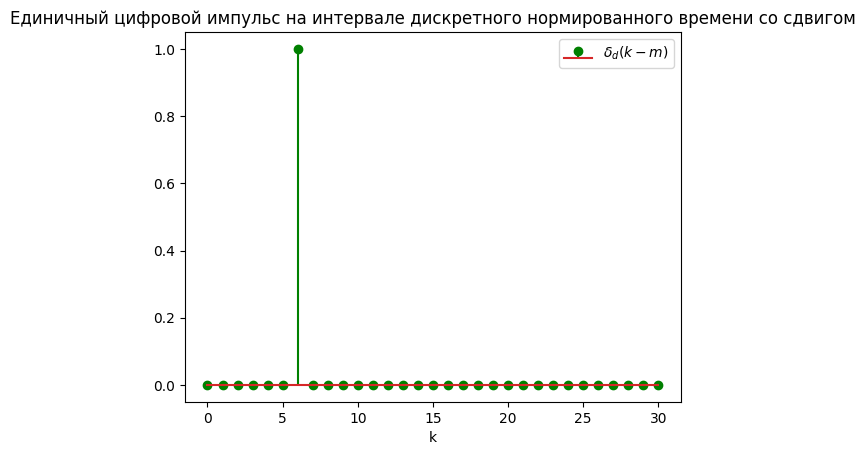

In [16]:
fig, ax = plt.subplots()
ax.stem(interval_norm, shifted_delta_norm(interval_norm), label='$\delta_d(k-m)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Единичный цифровой импульс на интервале дискретного нормированного времени со сдвигом")
ax.legend()
plt.show()

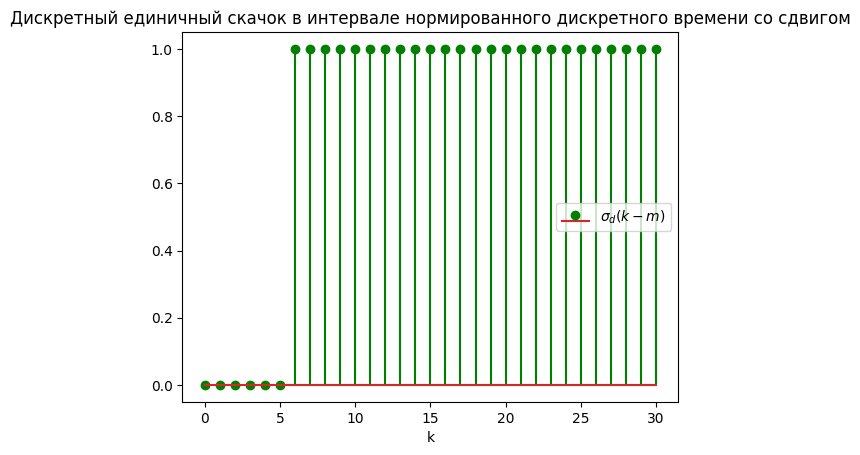

In [17]:
fig, ax = plt.subplots()
ax.stem(interval_norm, shifted_sigma_norm(interval_norm), label='$\sigma_d(k-m)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Дискретный единичный скачок в интервале нормированного дискретного времени со сдвигом")
ax.legend()
plt.show()

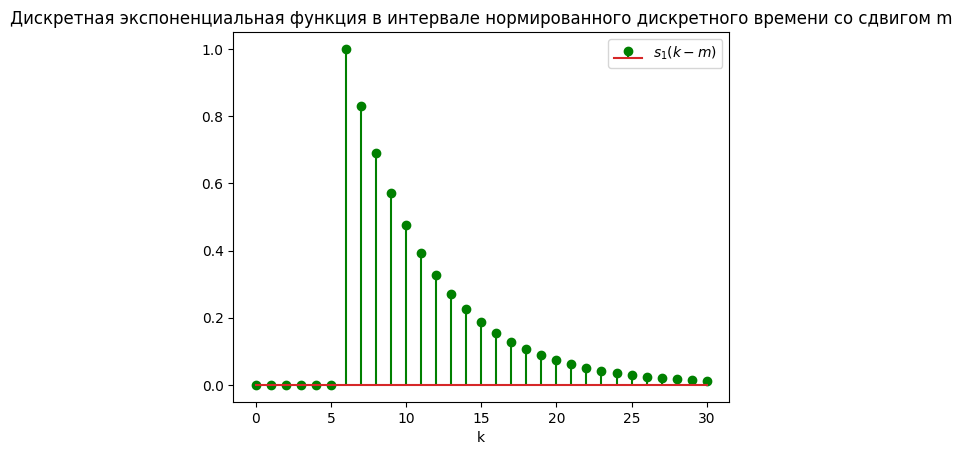

In [18]:
fig, ax = plt.subplots()
ax.stem(interval_norm, shifted_s_1_norm(interval_norm), label='$s_1(k-m)$', linefmt='g-')
ax.set_xlabel('k')
ax.set_title("Дискретная экспоненциальная функция в интервале нормированного дискретного времени со сдвигом m")
ax.legend()
plt.show()

Запишем формулы задержанных последовательностей.

$\delta_d(k-m)=\left\{ \begin{array}{cl}
1, & k-m = 0 \\
0, & k-m \neq 0
\end{array} \right., k\in\mathcal{Z}$ - единичный цифровой импульс (дискретный аналог дельта функции)

$\sigma_d(k-m)=\left\{ \begin{array}{cl}
1, & k-m \geq 0 \\
0, & k-m < 0
\end{array} \right., k\in\mathcal{Z}$ - дискретный единичный скачок (дискретный аналог функции Хэвисайда)

$s_1(k-m) =\left\{ \begin{array}{cl}
0, & k-m < 0 \\
a^k, & k-m \geq 0
\end{array} \right., k\in\mathcal{Z}$ - дискретная экспоненциальная функция

## Выводы
В ходе выполнения лабораторной работы были изучены основные функции дискретных сигналов: единичный цифровой импульс, дискретный единичный скачок, дискретная экспоненциальная функция и конмплексного гармонического сигнала. С помощью программных средств было проведено моделирование и анализ стандартных дискретных последовательностей, где было выявлена разница между дискретным временем и нормированных дискретным временем, поведение  функций на промежутках $nT \in [0, (N - 1)T]$, $n \in [0, N - 1]$ соответственно, а также их взаимосвязь с аналоговыми.

Было также показано, как задержка на $m$ отсчетов влияет на поведение этих функций. В результате выполнения работы были получены графики, демонстрирующие поведение этих функций в различных интервалах времени.
